# Data Analysis of IBM HR Data

In [432]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

hr = pd.read_csv('HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)

In [433]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Attrition - departure from an organization for any reason
    Attrition "yes" employee wants to leave company
    Attition "no" employee wants to remain with company
    
We will analyze how our features affect Attrition

# Domain Analysis

Age - Age of employee

Business Travel - frequency of travel

Department - department that employee belongs to

Diastance from home - miles from work

Hourly/Daily/Monthly Rating - rating given to employee

Education Field - educational background

Job and environment satisfaction

Job involvement - how much employee is involved in his job (1-5)

Job level - level of job. higher rating == hight job level

Performance rating  - performance

monthly income - monthly income

Percentage Salary Hike - annual increase

In [434]:
# checking for null values 

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [435]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Features "StandardHours and EmployeeCount have a standard deviation of 0. so can't use this in an analysis.

In [436]:
# Viewing object data

hr.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


the 'Over18' column only has 1 unique value. So we can't use this in analysis

# Exploratory Data Analysis

## Our target column is 'Attrition'

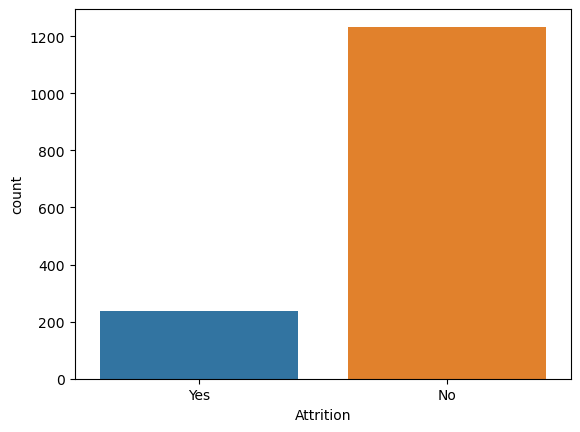

In [437]:
sns.countplot(x=hr.Attrition)
plt.show()

Data is imbalanced

## Impact of business travel on attrition

<AxesSubplot: xlabel='BusinessTravel', ylabel='count'>

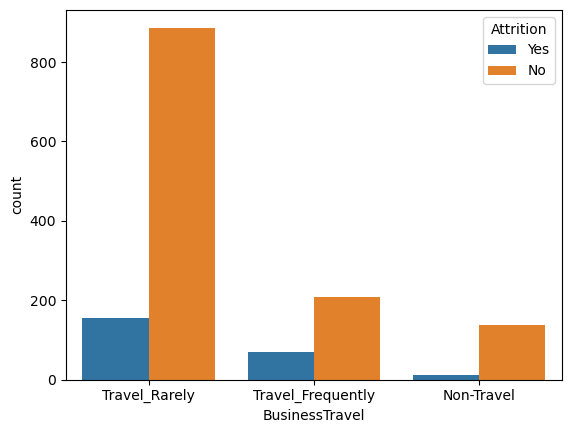

In [438]:
sns.countplot(hue = hr.Attrition, x=hr.BusinessTravel)

There are more employees that travel rarely who face attrition than those who travel frequently and those who dont tavel at all combined

# Impact of department on attrition

<AxesSubplot: xlabel='Department', ylabel='count'>

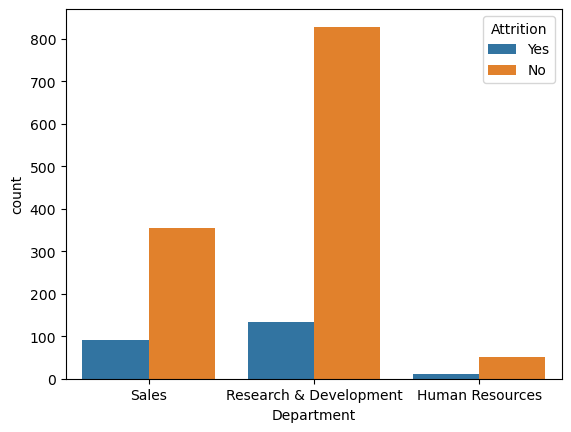

In [439]:
sns.countplot(hue=hr.Attrition, x = hr.Department)

Of the 3 departments in the dataset, R&D and Sales are experiencing the most attrition

# Impact of education on attrition

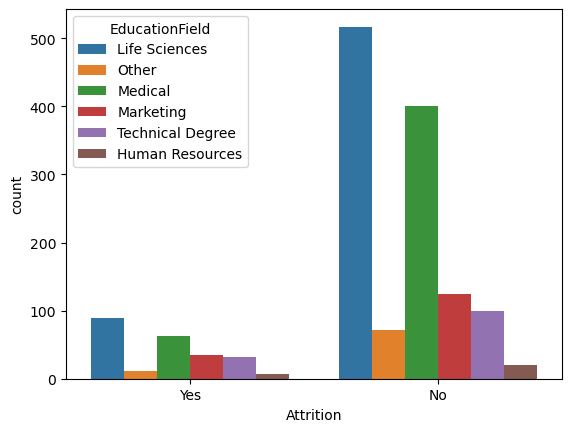

In [440]:
sns.countplot(hue=hr.EducationField, x= hr.Attrition)
plt.show()

Folks with Life Science and Medical backgrounds hold the highest attrition. About 1/6 employes in Life Sciences want to leave the company. 

# Gender and Attrition

<AxesSubplot: xlabel='Attrition', ylabel='count'>

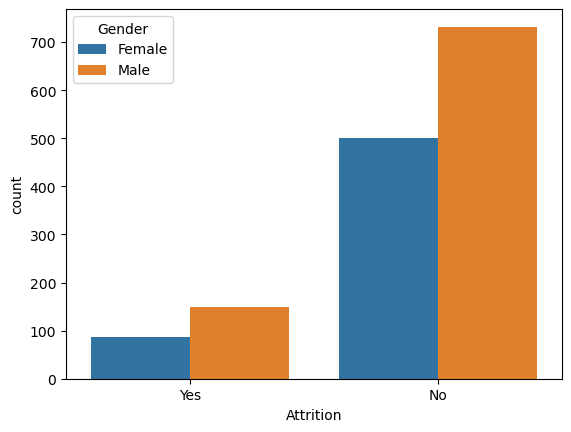

In [441]:
sns.countplot(x=hr.Attrition, hue=hr.Gender)

There a more male and female employees. 

# Overtime and Attrition

<AxesSubplot: xlabel='OverTime', ylabel='count'>

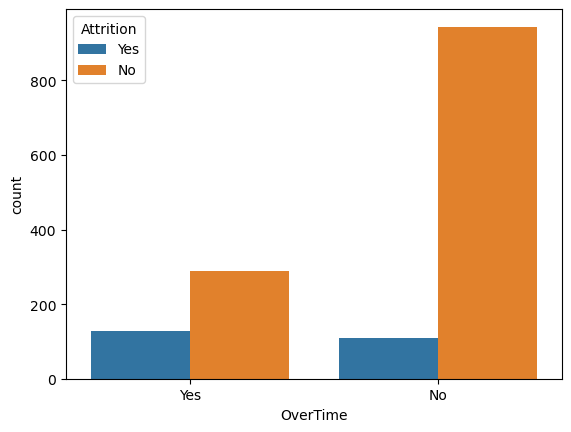

In [442]:
sns.countplot(x= hr.OverTime, hue = hr.Attrition)

Those who do overtime are experiencing more attrition

# Impact of Job Role on Attrition

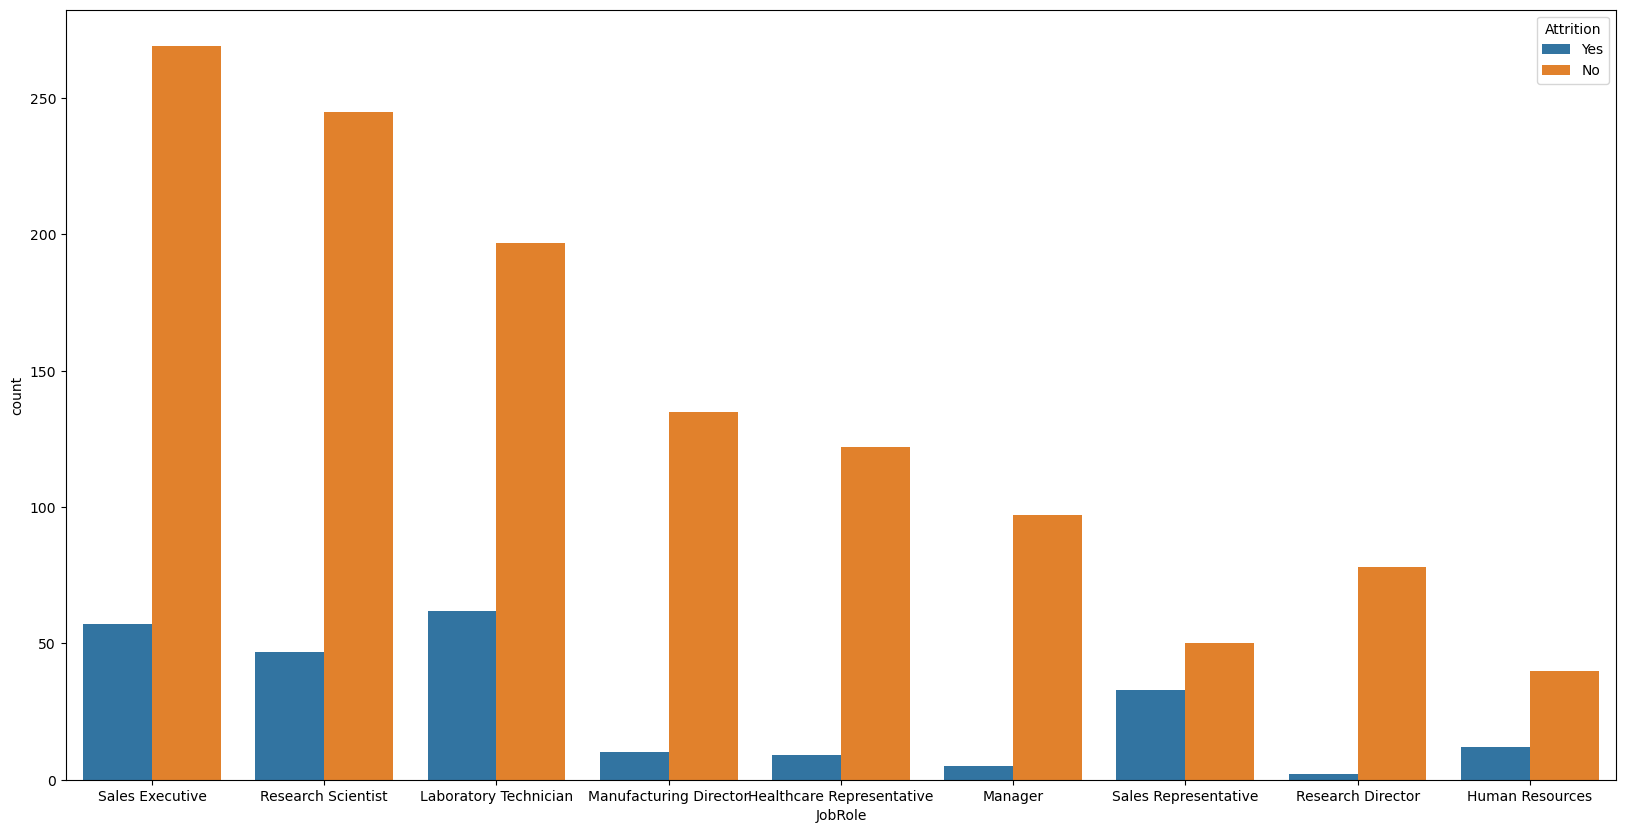

In [443]:
plt.figure(figsize = (20, 10))
sns.countplot(x=hr.JobRole, hue = hr.Attrition)

plt.show()

Lab techs and Sales execs are facing the highest attrition. Sales reps, HR, Research scientist have a concerning ratio of attrition

Managers and directors have lower rates of attrition

# Analysis on continuous Data

In [444]:
# creating list of numerical columns 
numerical_col = []
for column in hr.columns:
    if hr[column].dtype == 'int64' and len(hr[column].unique()) >= 10: #selecting features with more than 10 unique values
        numerical_col.append(column)

In [445]:
hr2 = hr[numerical_col]
hr2

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,94,5993,19479,8,11,8,6,4,0,5
1,49,279,8,2,61,5130,24907,1,23,10,10,7,1,7
2,37,1373,2,4,92,2090,2396,6,15,7,0,0,0,0
3,33,1392,3,5,56,2909,23159,1,11,8,8,7,3,0
4,27,591,2,7,40,3468,16632,9,12,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2061,41,2571,12290,4,17,17,5,2,0,3
1466,39,613,6,2062,42,9991,21457,4,15,9,7,7,1,7
1467,27,155,4,2064,87,6142,5174,1,20,6,6,2,0,3
1468,49,1023,2,2065,63,5390,13243,2,14,17,9,6,0,8


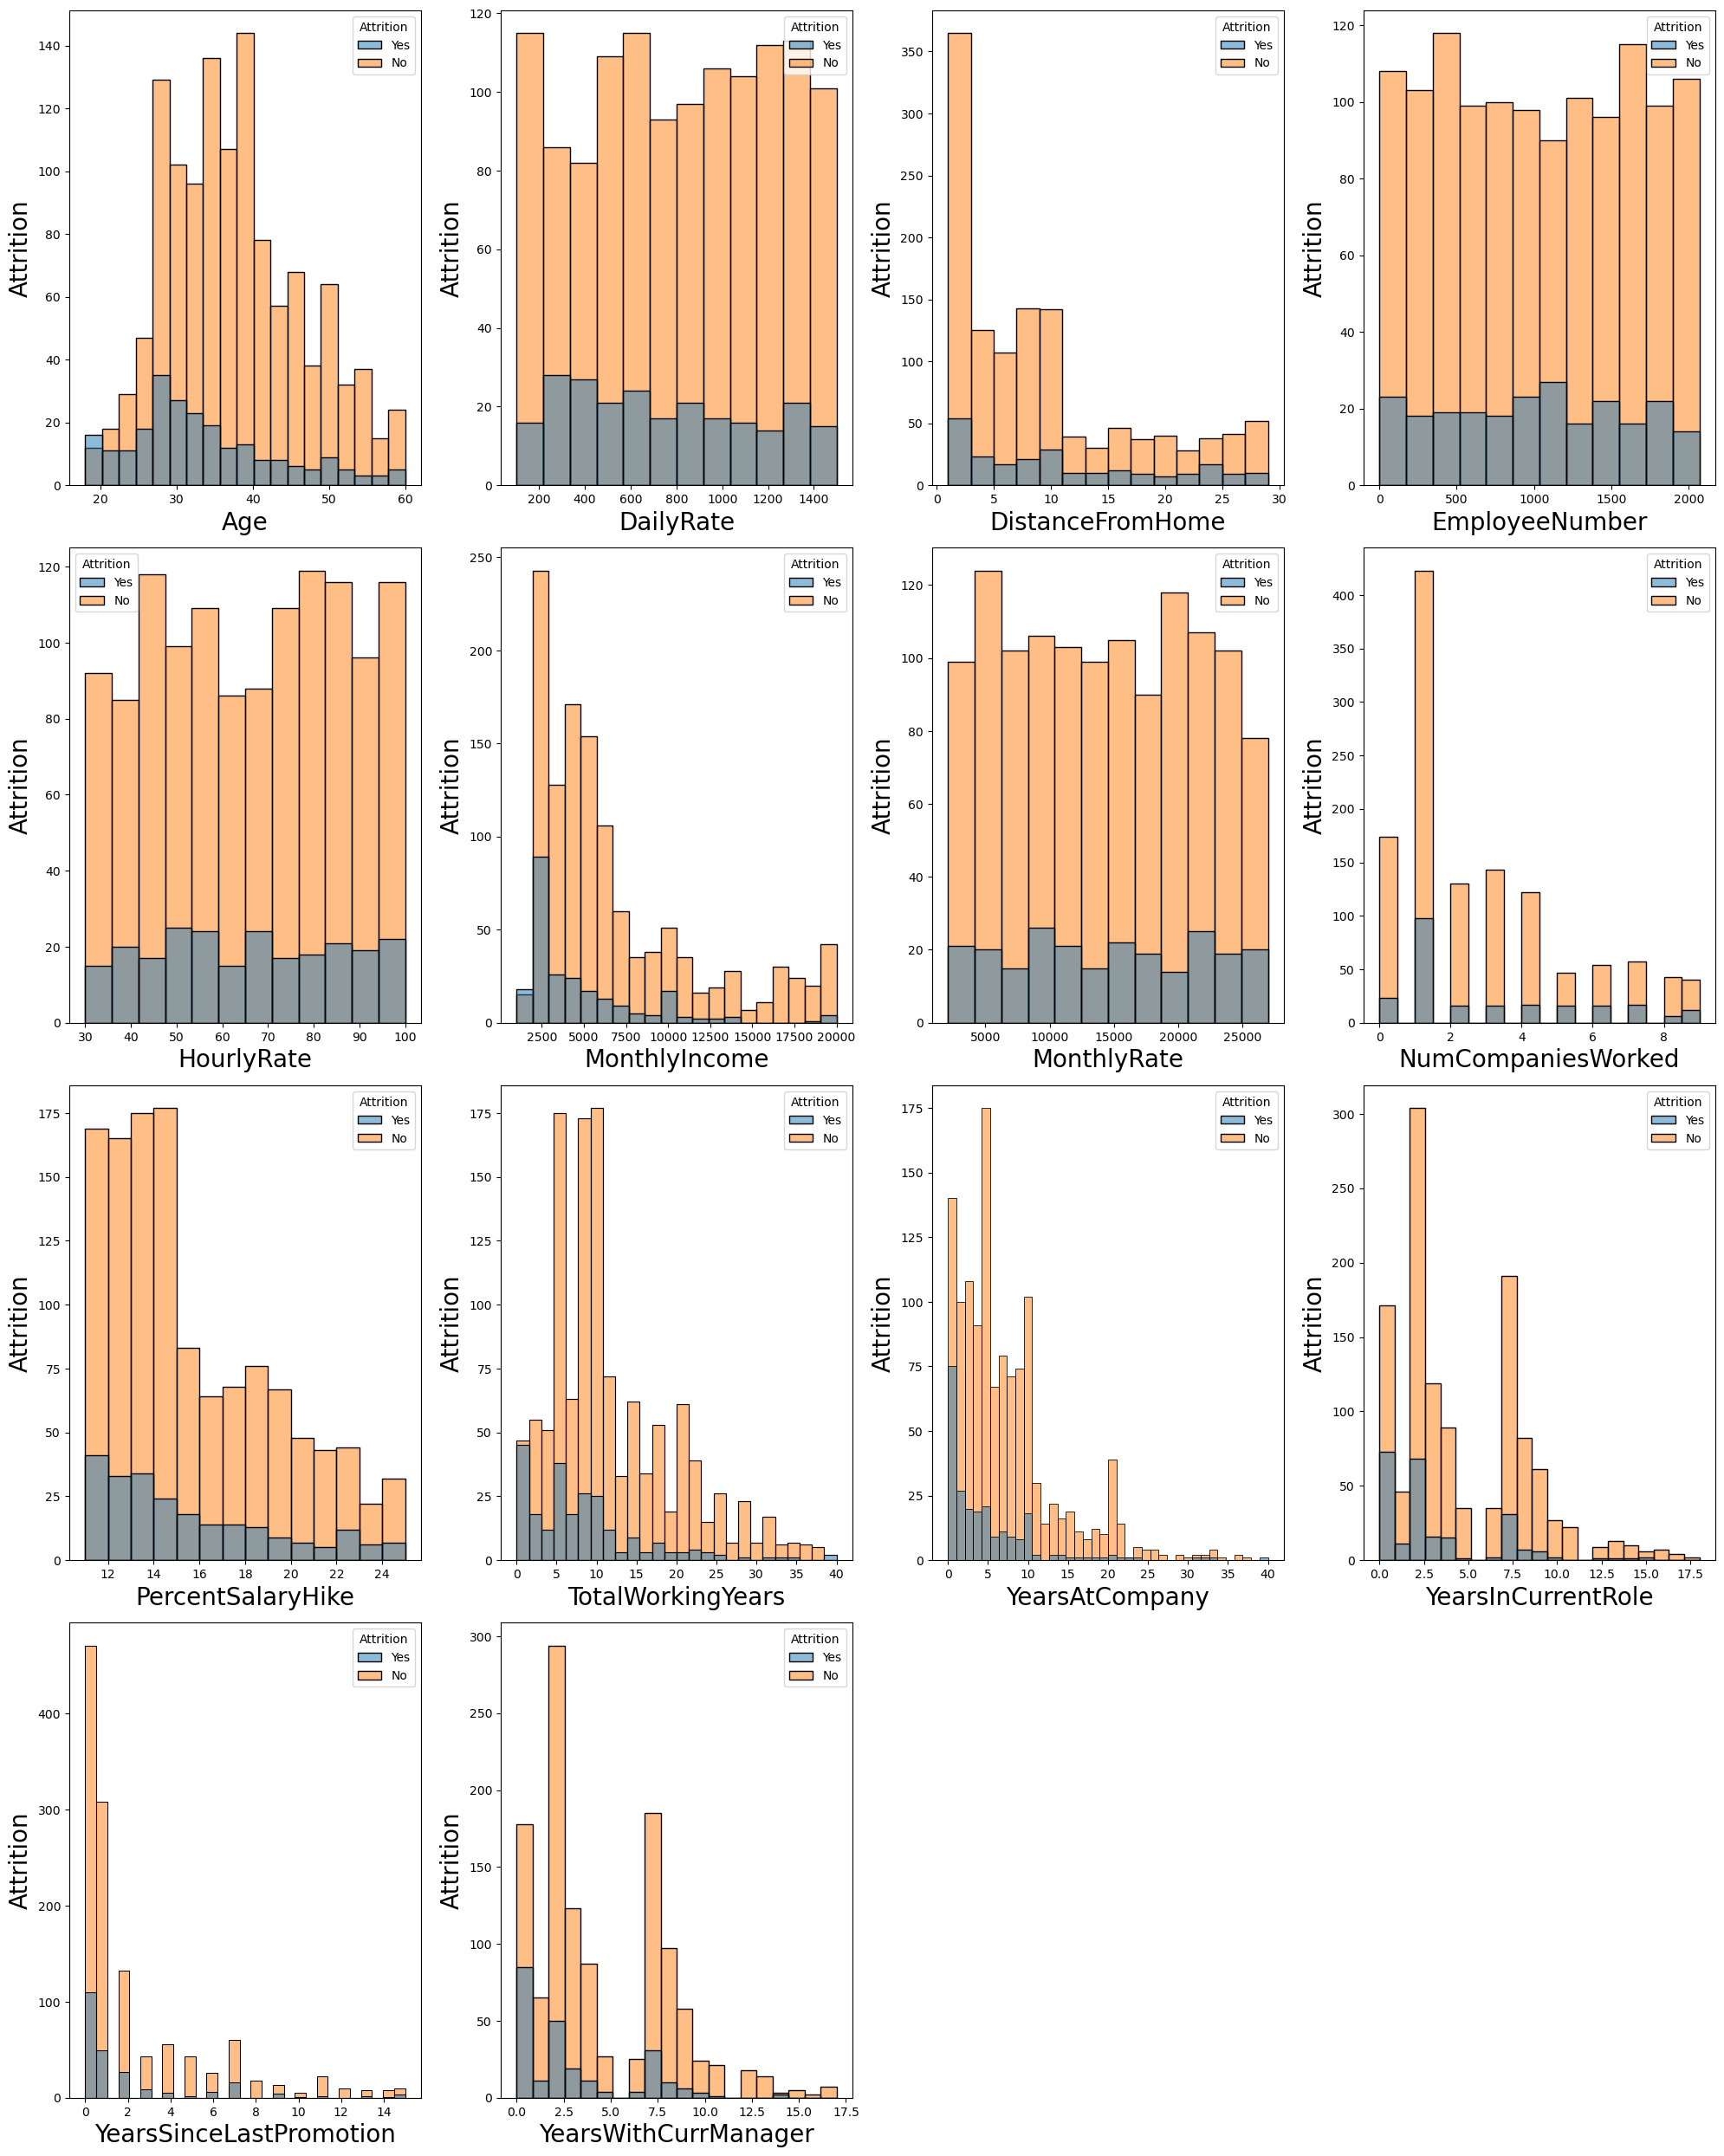

In [446]:
plt.figure(figsize=(20,25), facecolor ='white')
plotnumber = 1

for column in hr2:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=hr2[column].dropna(axis=0),
                    hue= hr.Attrition)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Attrition', fontsize =20)
    plotnumber +=1
plt.tight_layout()

# Analysis of Discrete data

In [447]:
discrete_col = []
for column in hr.columns:
    if hr[column].dtype == 'int64' and len(hr[column].unique()) <=15:
        discrete_col.append(column)
discrete_col

['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

In [448]:
hr3 = hr[discrete_col]
hr3

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,3,4,2,4,4,17,3,3,80,1,3,3
1466,1,1,4,2,3,1,4,15,3,1,80,1,5,3
1467,3,1,2,4,2,2,1,20,4,2,80,1,0,3
1468,3,1,4,2,2,2,2,14,3,4,80,0,3,2


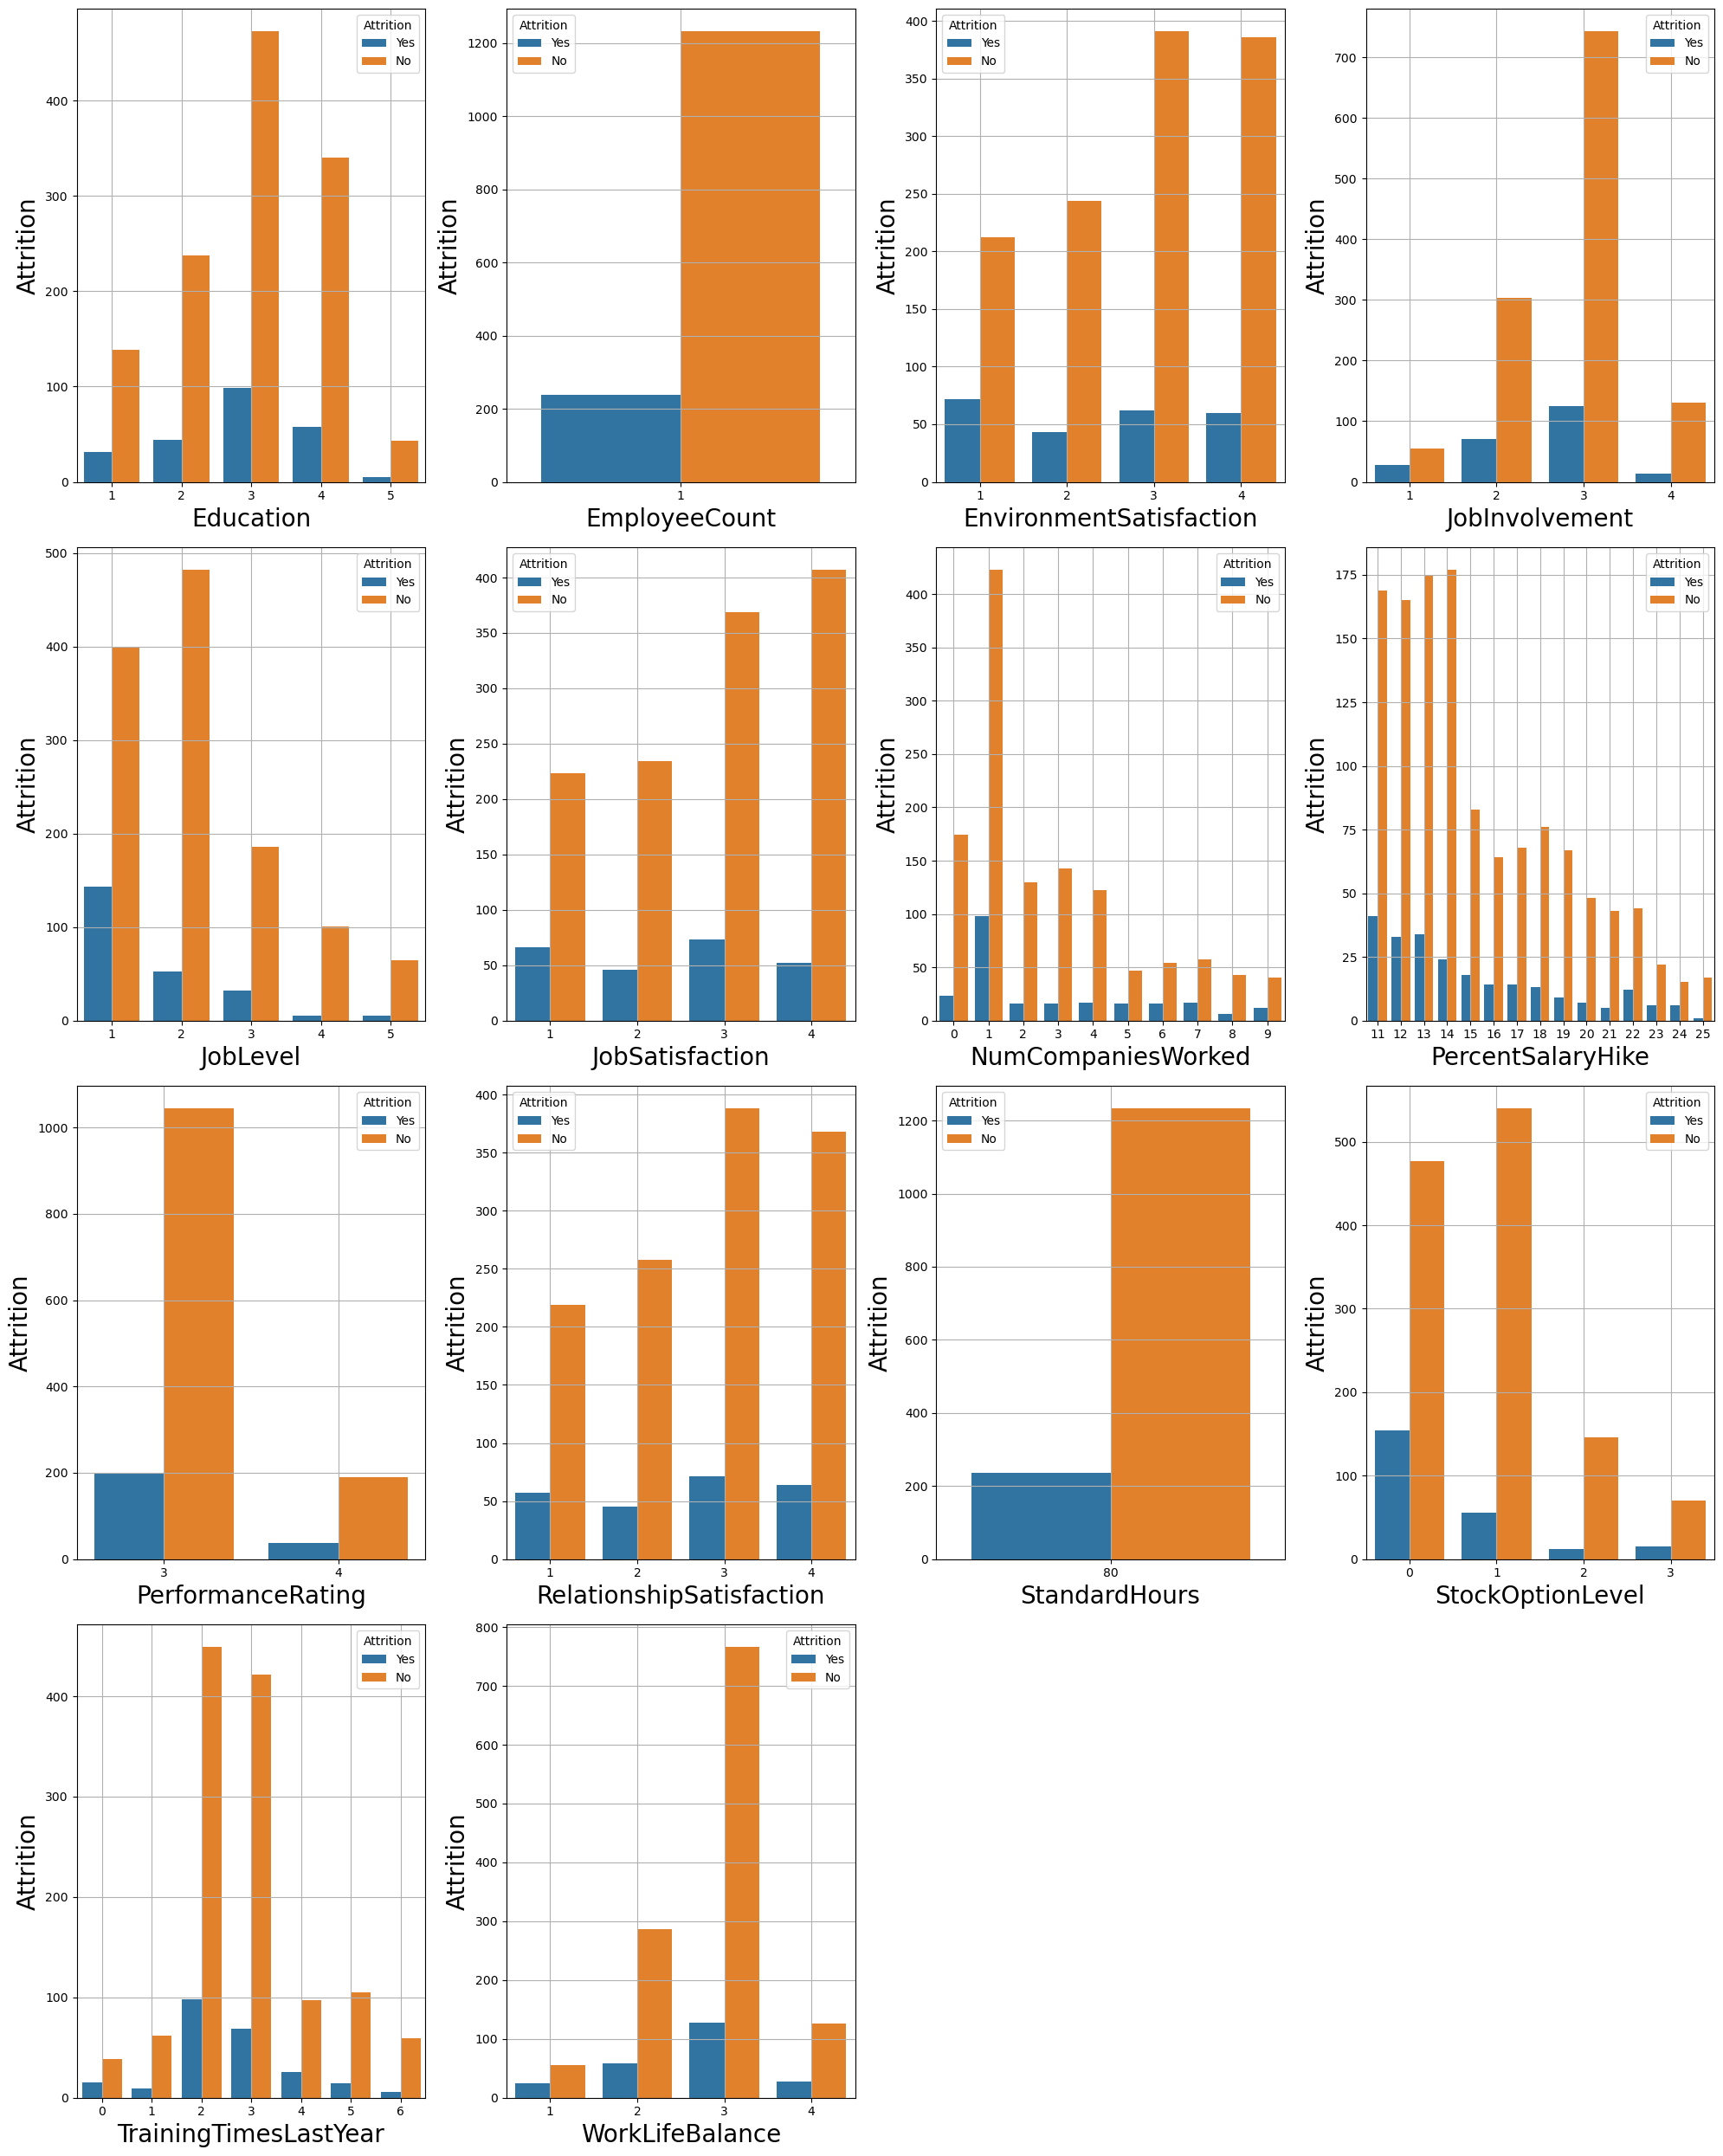

In [449]:
plt.figure(figsize=(20,25), facecolor ='white')
plotnumber = 1

for column in hr3:
    if plotnumber <=16:
        ax = plt.subplot(4,4, plotnumber)
        sns.countplot(x=hr3[column].dropna
                      (axis =0),
                     hue=hr.Attrition)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
        plt.grid()
    plotnumber +=1
plt.tight_layout()